 Karolina Tatarczyk 

#### A program that will allow segmentation of car models, using clustering methods.

## Import bibliotek

In [ ]:
import numpy as np
import pandas as pd
from plotnine import *

from scipy import stats

from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.datasets import make_classification

from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

from sklearn.preprocessing import StandardScaler

## Przygotowanie bazy danych

In [ ]:
df= pd.read_csv("auta.csv", index_col=0)
df.head()

,Cena,Przebieg,Pojemnosc,KM,diesle
Audi A3,20900.0,164450.0,1896.0,110,66.9
Audi A4,25311.4,182000.0,1900.0,130,75.7
Audi A6,31500.0,185000.0,2496.0,170,82.5
Audi A8,109000.0,129380.0,4134.0,300,68.1
Audi Q7,179000.0,72000.0,3000.0,240,89.1


## Standaryzacja danych

In [ ]:
z = StandardScaler()

auta = df.copy()
auta[auta.columns]=z.fit_transform(df[df.columns])
auta.head()

,Cena,Przebieg,Pojemnosc,KM,diesle
Audi A3,-0.198580,0.484563,-0.017676,-0.248784,0.040064
Audi A4,-0.055174,0.944320,-0.009643,0.202004,0.458097
Audi A6,0.146007,1.022911,1.187258,1.103579,0.781122
Audi A8,2.665391,-0.434164,4.476727,4.033697,0.097069
Audi Q7,4.940965,-1.937346,2.199402,2.681335,1.094646


# Grupowanie metodą K-średnich

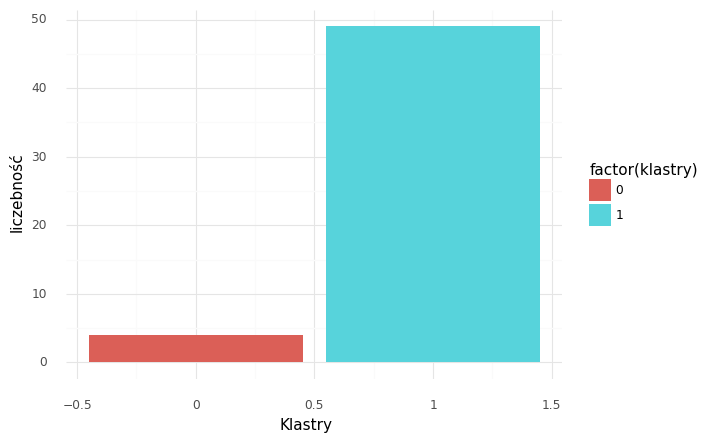

<ggplot: (8773078913829)>

In [ ]:
km=KMeans(n_clusters=2).fit(auta)

auta['klastry']= km.labels_

(ggplot(auta, aes(x = 'klastry', fill = 'factor(klastry)')) +
 geom_bar() +
 theme_minimal()+
 labs(x = 'Klastry', y='liczebność')
)

Widoczna jest mocna dysproporcja liczności klastrów, dlatego też decyduję się na wybór większej ilości klastrów.

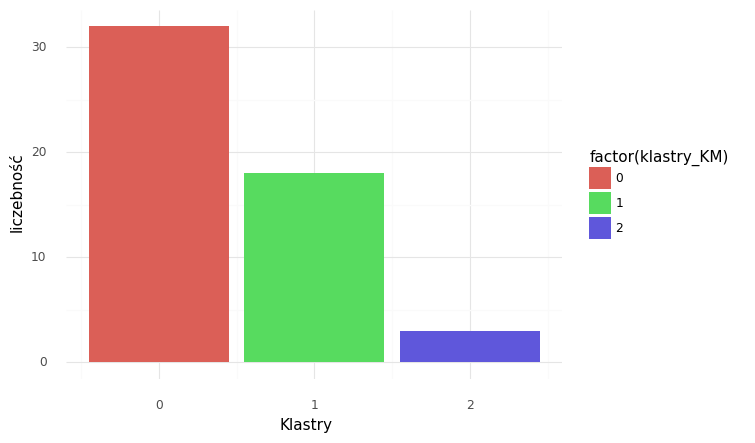

<ggplot: (8773081835813)>

In [ ]:
km=KMeans(n_clusters=3).fit(auta)

df['klastry_KM']=km.labels_
auta.head()

(ggplot(auta, aes(x = 'klastry_KM', fill = 'factor(klastry_KM)')) +
 geom_bar() +
 theme_minimal()+
 labs(x = 'Klastry', y='liczebność')
)

W tym przypadku znowu jeden z klastrów ma małą liczność. Można więc wnioskować że te kilka samochodów mocno odbiega od innych. Przystąpię teraz do analizy wszystkich czynników oraz ich różnic w każdym z klastrów.

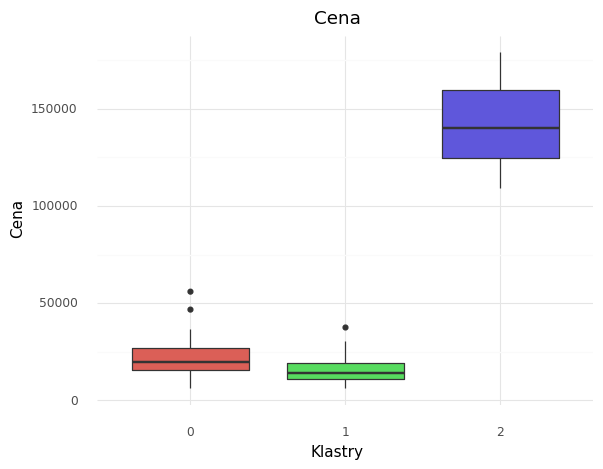

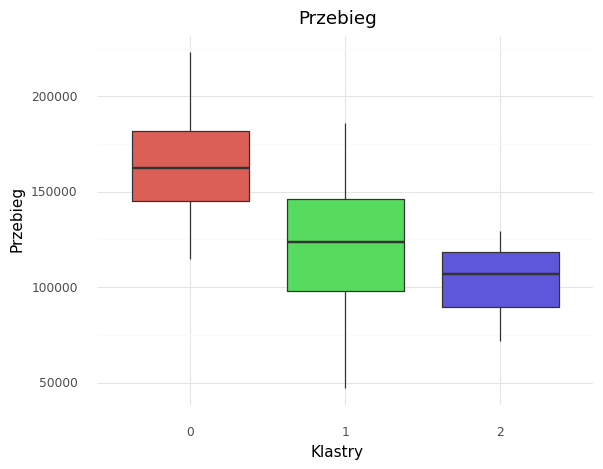

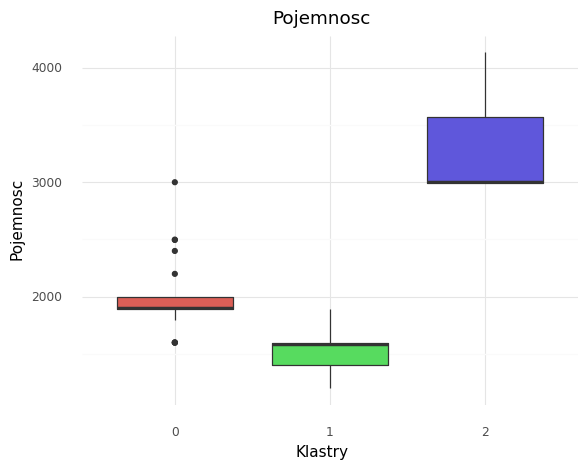

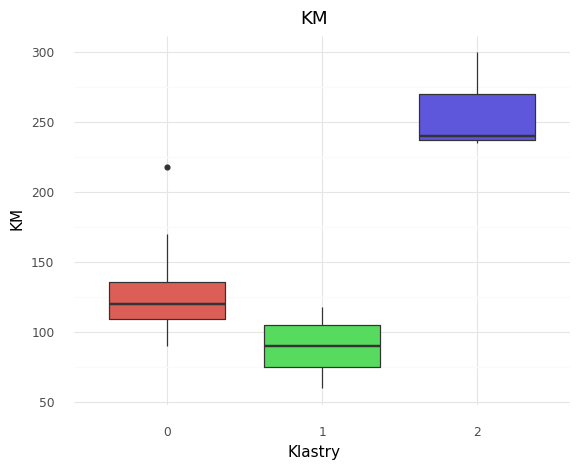

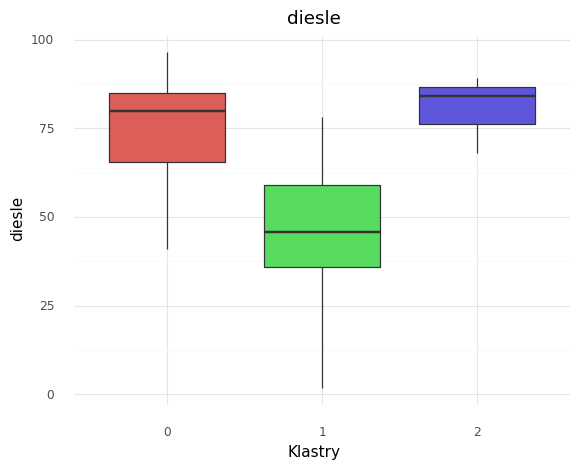

In [ ]:
for zm in df.columns[:-1]:
  print((ggplot(df, aes(x='factor(klastry_KM)', y= zm, fill = 'factor(klastry_KM)')) +
    geom_boxplot(show_legend = False) +
    theme_minimal() +
    labs(x = 'Klastry', title = zm)
    ))

Z wykresu przedstawiającego rozkład klastrów ze względu na grupę, widoczna mocna przewaga klastra 1 - klaster 1 charakteryzuje więc wysoka cena samochodów.
Klastry 0 i 2 kształtują się w podobnym przedziale cenowym.

W przypadku analizy wpływu przebiegu na podział na klastry, można zauważyć, że
klaster 0 charakteryzuje wysoki przebieg, w porównaniu z resztą klastrów które są na podobnym poziomie.

Jeśli chodzi o kolejny czynnik to największa pojemność charakteryzuje klaster 1,
a najmniejsza pojemność - klaster 2. Tak samo dla analizy koni mechanicznych.

W przypadku czynnika diesle, najmniejsza wartość charakteryzuje klaster 2.

Klaster 0:
- cena niska (ok.20 000)
- przebieg wysoki (ok. 150 000 - 180 000)
- pojemność średnia (ok. 2 000)
- km średni (ok. 120)
- diesle wysoki (ok. 60-80)


Klaster 1:
- cena wysoka (ok.150 000)
- przebieg niski (ok. 80 000 - 115 000)
- pojemność wysoka (ok.3 000- 3 500)
- km wysoki (ok. 250)
- diesle wysoki (ok. 75-80)


Klaster 2:
- cena niska (ok.15 000)
- przebieg średni (ok. 100 000 - 150 000)
- pojemność niska (ok. 1 500)
- km niski (ok. 90)
- diesle niski (ok. 35-60)

## Grupowanie za pomocą GMM

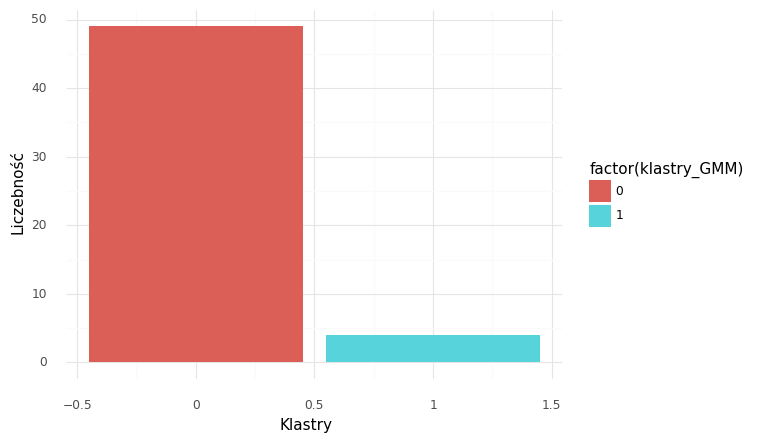

<ggplot: (8773077771105)>

In [ ]:
gm = GaussianMixture(n_components = 2).fit(auta)

auta['klastry_GMM'] = gm.predict(auta)

(ggplot(auta, aes(x = 'klastry_GMM', fill = 'factor(klastry_GMM)')) +
 geom_bar() + 
 theme_minimal() +
 labs(x = 'Klastry', y='Liczebność')
)

W przypadku grupowania GMM znów mamy dysproporcję dla 2 klastrów. 

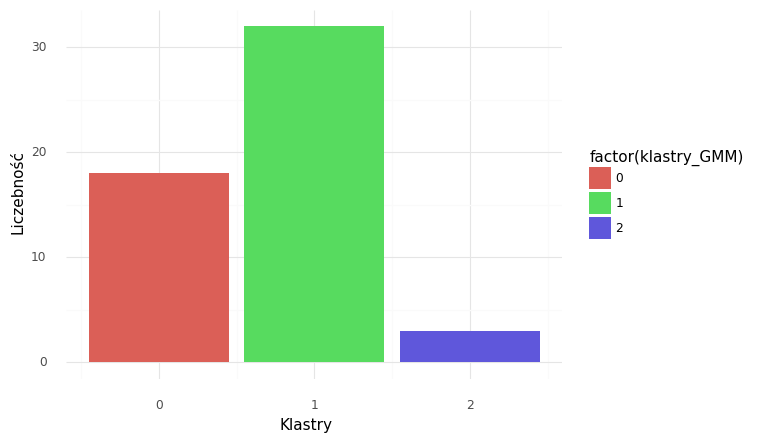

<ggplot: (8773077731693)>

In [ ]:
gm = GaussianMixture(n_components = 3).fit(auta)

df['klastry_GMM'] = gm.predict(auta)

(ggplot(df, aes(x = 'klastry_GMM', fill = 'factor(klastry_GMM)')) +
 geom_bar() + 
 theme_minimal() +
 labs(x = 'Klastry', y='Liczebność')
)

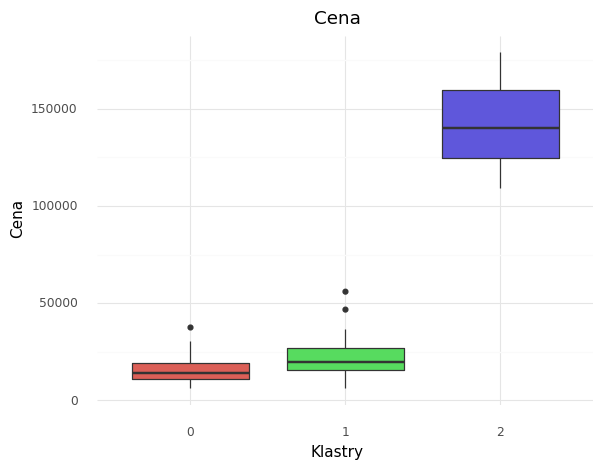

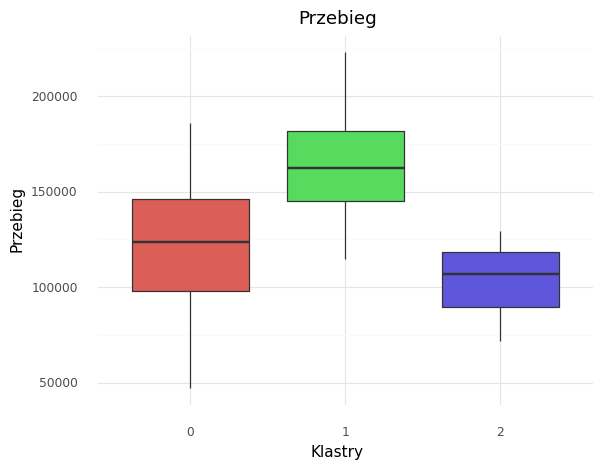

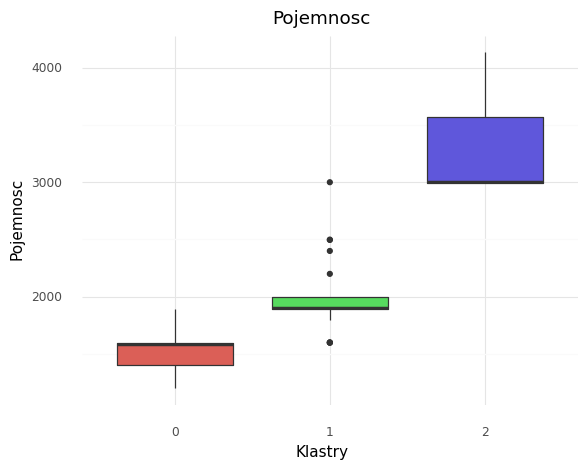

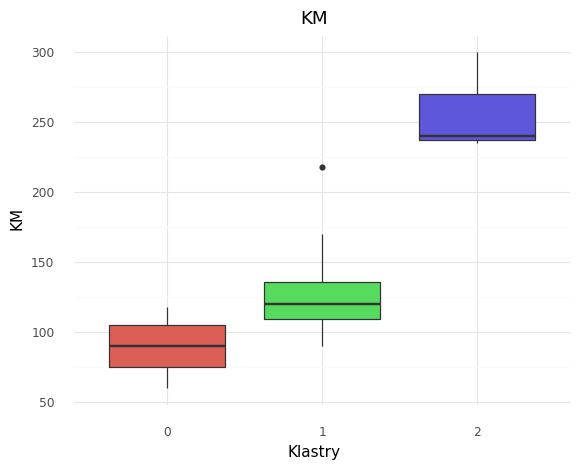

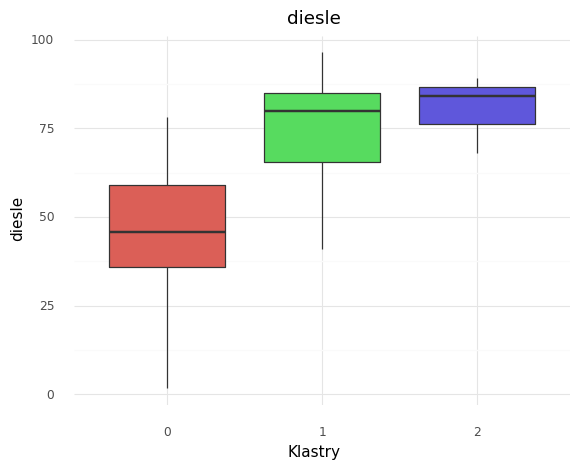

In [ ]:
for zm in df.columns[:-2]:
  print((ggplot(df, aes(x='factor(klastry_GMM)', y= zm, fill = 'factor(klastry_GMM)')) +
    geom_boxplot(show_legend = False) +
    theme_minimal() +
    labs(x = 'Klastry', title = zm)
    ))

Klaster 0:
- cena niska (ok.15 000)
- przebieg średni (ok. 100 000 - 150 000)
- pojemność niska (ok. 1 500)
- km niski (ok. 90)
- diesle niski (ok. 35-60)

Klaster 1:
- cena niska (ok.20 000)
- przebieg wysoki (ok. 150 000 - 180 000)
- pojemność średnia (ok. 2 000)
- km średni (ok. 120)
- diesle wysoki (ok. 60-80)

Klaster 2:
- cena wysoka (ok.150 000)
- przebieg niski (ok. 80 000 - 115 000)
- pojemność wysoka (ok.3 000- 3 500)
- km wysoki (ok. 250)
- diesle wysoki (ok. 75-80)

Analiza jest identyczna jak dla metody KMeans. Jedynie numeracja klastrów została zmieniona, ale grupa cech jest taka sama dla każdego z klastrów.


##Grupowanie za pomocą DBSCAN

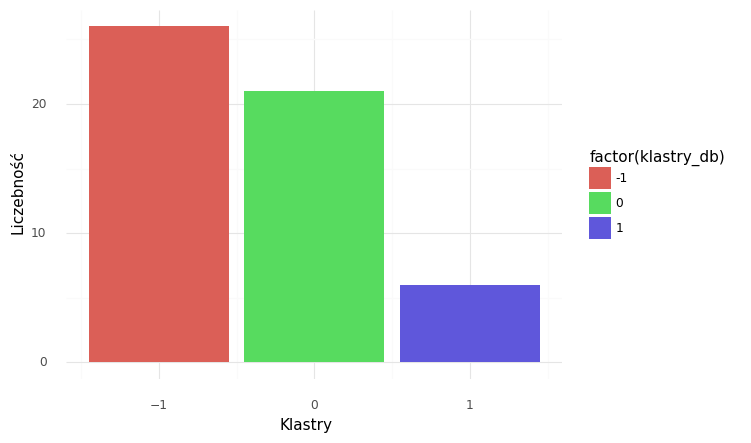

<ggplot: (8773077700641)>

In [ ]:
db = DBSCAN(eps = 0.9, min_samples = 5 ).fit(auta)
auta['klastry_db'] = db.labels_
df['klastry_db']=db.labels_

(ggplot(auta, aes(x = 'klastry_db', fill = 'factor(klastry_db)')) +
 geom_bar() + 
 theme_minimal() +
 labs(x = 'Klastry', y='Liczebność')
)


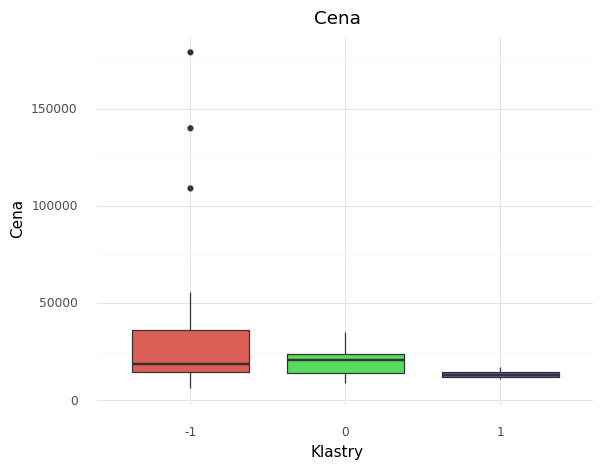

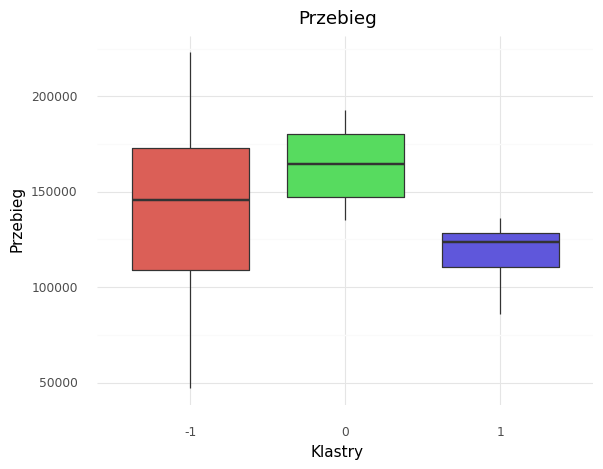

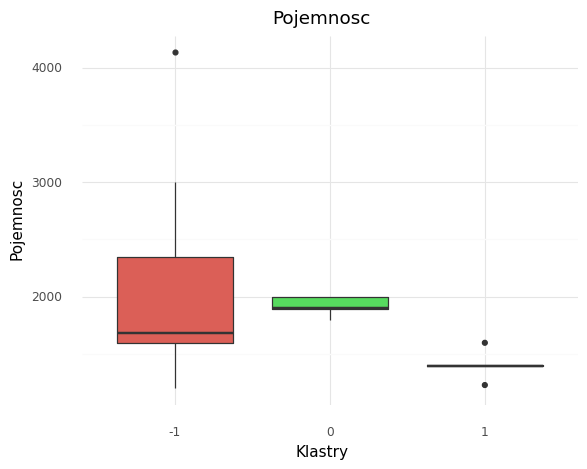

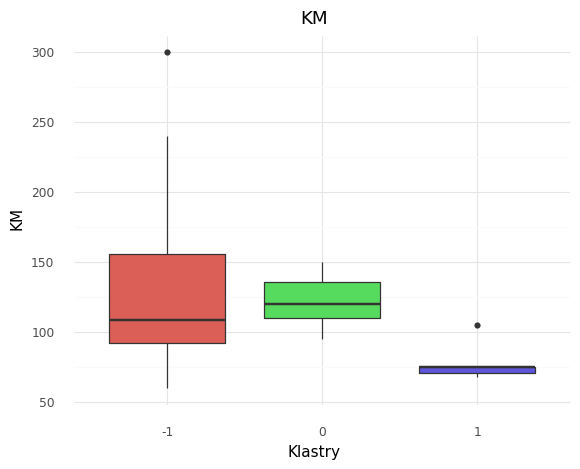

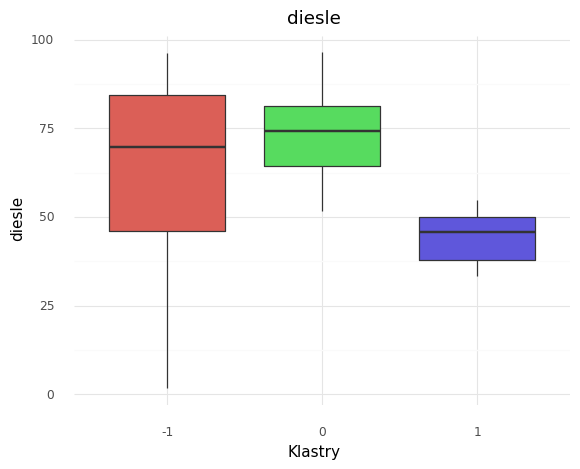

In [ ]:
for zm in df.columns[:-3]:
  print((ggplot(df, aes(x='factor(klastry_db)', y= zm, fill = 'factor(klastry_db)')) +
    geom_boxplot(show_legend = False) +
    theme_minimal() +
    labs(x = 'Klastry', title = zm)
    ))


Klaster -1 (szum):
- cena średnia (ok.30 000)
- przebieg średni (ok. 110 000 - 170 000)
- pojemność wysoka (ok. 1 500 - 2 500)
- km wysoka (ok. 100 - 150)
- diesle wysoki (ok. 50-80)

Klaster 0:
- cena niska (ok.20 000)
- przebieg wysoki (ok. 150 000 - 180 000)
- pojemność średnia (ok. 2 000)
- km średni (ok. 120 - 140)
- diesle wysoki (ok. 65-80)

Klaster 1:
- cena niska (ok.10 000)
- przebieg niski (ok. 110 000 - 130 000)
- pojemność niska (ok.1 500)
- km niski (ok. 75)
- diesle niski (ok. 35-50)


W tym przypadku DBSCAN cechy w klastrach nieznacznie różnią się od wcześniejszych analiz grupowań. Z ramki poniżej, można zobaczyć że pierwsze dwie analizy dają identyczny wynik (tylko z innymi numeracjami klastrów).


In [ ]:
df

,Cena,Przebieg,Pojemnosc,KM,diesle,klastry_KM,klastry_GMM,klastry_db
Audi A3,20900.0000,164450.0,1896.0,110,66.9,0,1,0
Audi A4,25311.4000,182000.0,1900.0,130,75.7,0,1,0
Audi A6,31500.0000,185000.0,2496.0,170,82.5,0,1,-1
Audi A8,109000.0000,129380.0,4134.0,300,68.1,2,2,-1
Audi Q7,179000.0000,72000.0,3000.0,240,89.1,2,2,-1
BMW 316,6150.0000,186000.0,1600.0,105,1.7,1,0,-1
BMW 318,14500.0000,173980.0,1895.0,118,32.8,1,0,-1
BMW 320,21699.0000,178000.0,2000.0,150,81.4,0,1,0
BMW 520,55900.0000,149350.0,1998.0,163,65.7,0,1,-1
BMW 525,17110.0000,207000.0,2499.0,163,87.7,0,1,-1


In [ ]:
Sylwetka = []
for i in range(2,len(df)):
  km = KMeans(n_clusters = i).fit(auta)
  df['klastry_km'] = km.labels_

  sylwetka_km = round(silhouette_score(auta, km.labels_), 4)
  Sylwetka.append(sylwetka_km)
 

In [ ]:
Sylwetka

[0.6241,
 0.3495,
 0.2855,
 0.3211,
 0.2613,
 0.2709,
 0.2756,
 0.291,
 0.2663,
 0.2722,
 0.2717,
 0.2689,
 0.2544,
 0.2656,
 0.2502,
 0.2802,
 0.265,
 0.2472,
 0.2575,
 0.2488,
 0.2317,
 0.2183,
 0.2441,
 0.2447,
 0.2392,
 0.2317,
 0.2133,
 0.2348,
 0.2258,
 0.2082,
 0.2151,
 0.193,
 0.2004,
 0.1894,
 0.1856,
 0.1698,
 0.1637,
 0.1487,
 0.1353,
 0.1352,
 0.1241,
 0.0997,
 0.1083,
 0.0884,
 0.0801,
 0.0693,
 0.0606,
 0.0542,
 0.0395,
 0.0262,
 0.0101]